In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from astropy.timeseries import LombScargle
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

## Light Curve

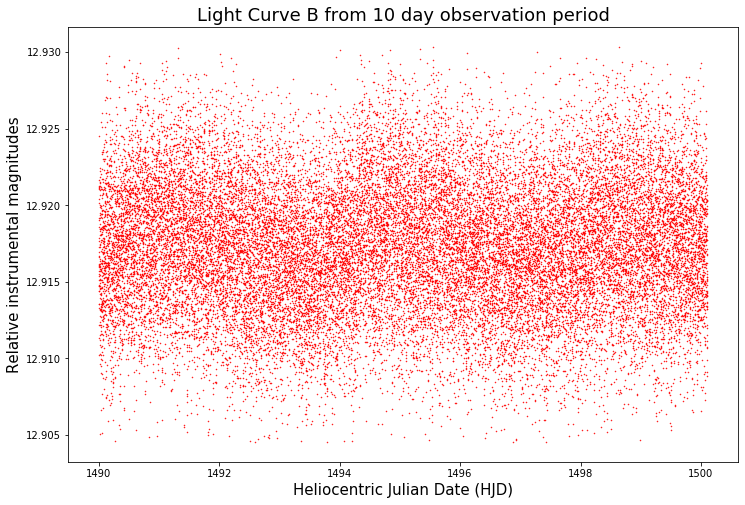

In [2]:
data = np.loadtxt("LightCurveB.dat")
date, mag = data[:,0], data[:,1]
magNorm = mag-np.mean(mag)
plt.figure(figsize=(12,8))
plt.plot(date, mag, 'r.', markersize=1)
plt.xlabel("Heliocentric Julian Date (HJD)",fontsize=15)
plt.ylabel("Relative instrumental magnitudes",fontsize=15)
plt.title("Light Curve B from 10 day observation period",fontsize=18)
plt.savefig('LCB.png')

In [3]:
np.mean(mag)

12.91729456011475

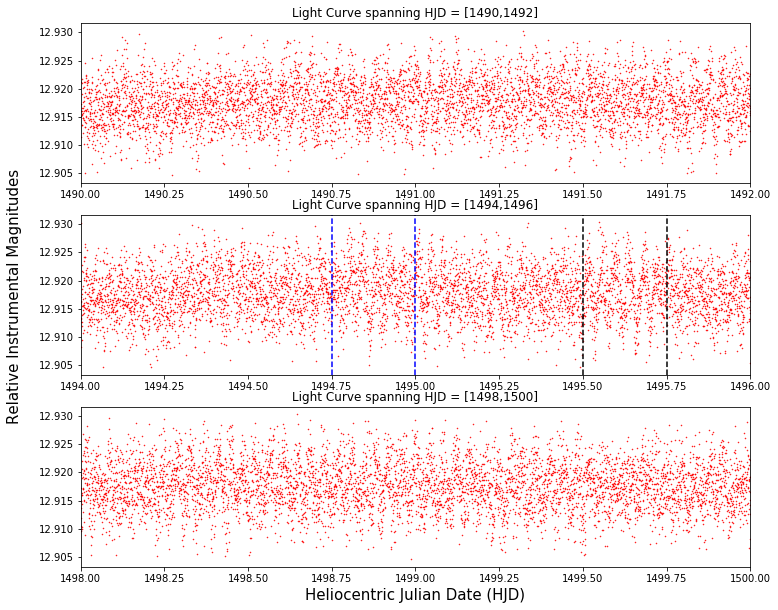

In [4]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)   #big subplot
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(date, mag, 'r.', markersize=1)
ax1.set_xlim([1490, 1492])

ax2.plot(date, mag, 'r.', markersize=1)
ax2.set_xlim([1494, 1496])
ax2.axvline(x=1495.50, color = 'k', linestyle='--')
ax2.axvline(x=1495.75, color = 'k', linestyle='--')
ax2.axvline(x=1494.75, color = 'b', linestyle='--')
ax2.axvline(x=1495.00, color = 'b', linestyle='--')

ax3.plot(date, mag, 'r.', markersize=1)
ax3.set_xlim([1498, 1500])

# Set common labels
ax.set_xlabel('Heliocentric Julian Date (HJD)', fontsize=15)
fig.text(0.04, 0.5, 'Relative Instrumental Magnitudes', va='center', rotation='vertical',fontsize=15)

ax1.set_title('Light Curve spanning HJD = [1490,1492]')
ax2.set_title('Light Curve spanning HJD = [1494,1496]')
ax3.set_title('Light Curve spanning HJD = [1498,1500]')

plt.savefig('LCsubsets.png')

In [5]:
# avgMag = np.mean(mag[0:28000].reshape(-1, 1000), axis=1)  # take avg of every 1000 points
# avgDate = np.mean(date[0:28000].reshape(-1, 1000), axis=1)  # take avg of every 1000 points

# plt.figure(figsize=(12,8))
# plt.plot(avgDate, avgMag, "ro-.")
# plt.xlabel("Averaged Date",fontsize=15)
# plt.ylabel("Averaged Magnitude",fontsize=15)
# plt.title("Light Curve averaged every 1000 data points",fontsize=18)

## Nyquist Frequency

In [119]:
dt = date[1]-date[0]
dt_arr = []
for i in range(len(date)):
    dt_arr.append(date[i]-date[i-1])

avgDt = np.mean(dt_arr[1:])
avgNyq = 1/(2*avgDt)  # average cycles per day (c/d)

avgNyq2 = (avgNyq/86400)*1000  # mHz
print("Nyquist Frequency: {:.4f} (c/d) and {:.4f} mHz ".format(avgNyq, avgNyq2))
print("Compared to the not averaged: {:.4f} (c/d)".format(1/(2*dt)))
avgDt

Nyquist Frequency: 1422.6353 (c/d) and 16.4657 mHz 
Compared to the not averaged: 1366.1202 (c/d)


0.0003514604284025319

## Finest Frequency Resolution

In [7]:
dF = 1/(2*(date[-1]-date[0]))
dF

0.0494692004263453

## Normalizing Light Curve

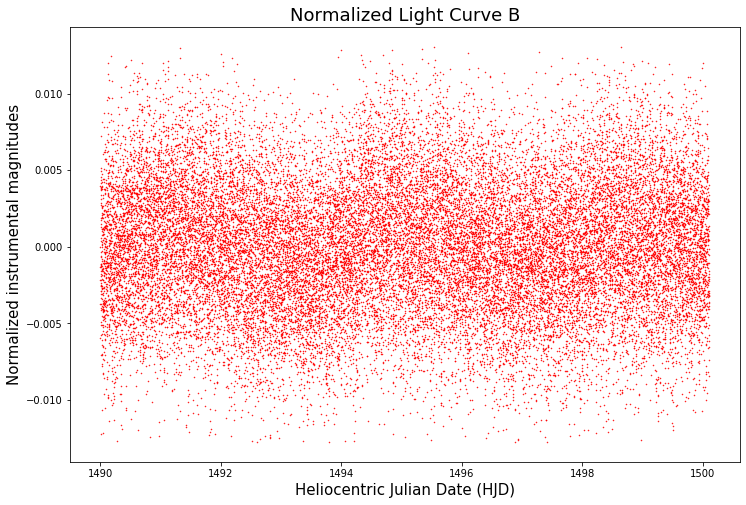

In [8]:
plt.figure(figsize=(12,8))
plt.plot(date, magNorm, 'r.', markersize=1)
plt.xlabel("Heliocentric Julian Date (HJD)",fontsize=15)
plt.ylabel("Normalized instrumental magnitudes",fontsize=15)
plt.title("Normalized Light Curve B",fontsize=18)
plt.savefig('normLCB.png')

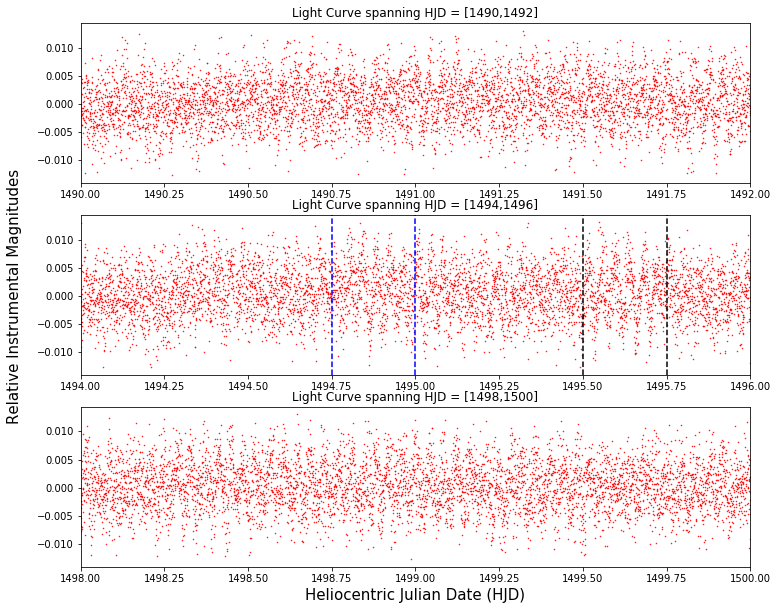

In [9]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)   #big subplot
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(date, magNorm, 'r.', markersize=1)
ax1.set_xlim([1490, 1492])


ax2.plot(date, magNorm, 'r.', markersize=1)
ax2.set_xlim([1494, 1496])
ax2.axvline(x=1495.50, color = 'k', linestyle='--')
ax2.axvline(x=1495.75, color = 'k', linestyle='--')
ax2.axvline(x=1494.75, color = 'b', linestyle='--')
ax2.axvline(x=1495.00, color = 'b', linestyle='--')

ax3.plot(date, magNorm, 'r.', markersize=1)
ax3.set_xlim([1498, 1500])

# Set common labels
ax.set_xlabel('Heliocentric Julian Date (HJD)', fontsize=15)
fig.text(0.04, 0.5, 'Relative Instrumental Magnitudes', va='center', rotation='vertical',fontsize=15)

ax1.set_title('Light Curve spanning HJD = [1490,1492]')
ax2.set_title('Light Curve spanning HJD = [1494,1496]')
ax3.set_title('Light Curve spanning HJD = [1498,1500]')

plt.savefig('LCsubsetsNorm.png')

## Periodogram and FFT

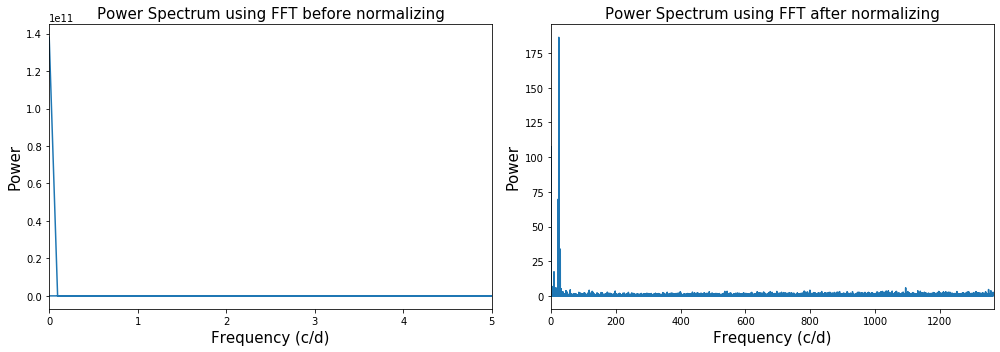

In [10]:
freq = np.fft.fftfreq(len(date),d=dt) 

magF = np.fft.fft(magNorm)   # frouier transfromed data
power = magF.real**2+magF.imag**2

magF2 = np.fft.fft(mag)   # frouier transfromed data
power2 = magF2.real**2+magF2.imag**2


plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(freq,power2)
plt.xlim(0,max(freq))
plt.title("Power Spectrum using FFT before normalizing",fontsize=15)
plt.xlabel("Frequency (c/d)",fontsize=15)
plt.ylabel("Power",fontsize=15)
plt.xlim(0,5)

plt.subplot(122)
plt.plot(freq,power)
plt.xlim(0,max(freq))
plt.title("Power Spectrum using FFT after normalizing",fontsize=15)
plt.xlabel("Frequency (c/d)",fontsize=15)
plt.ylabel("Power",fontsize=15)
#plt.xlim(0,40)

plt.tight_layout()
plt.savefig("FFTex.png")

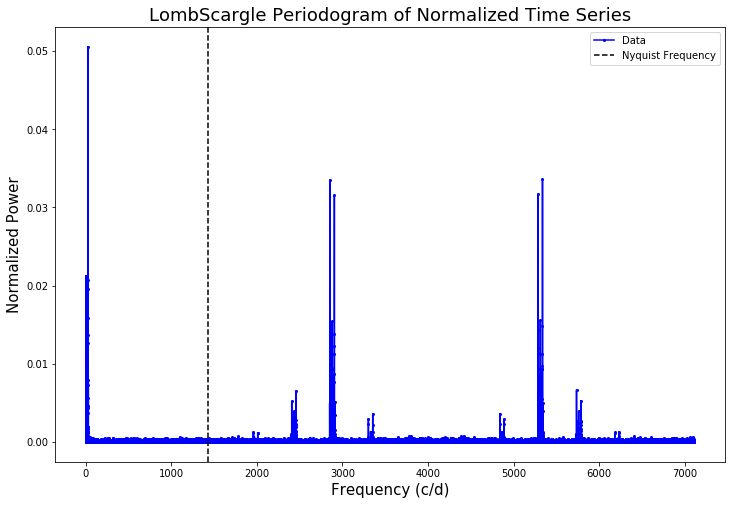

In [75]:
frequency, power = LombScargle(date, magNorm,center_data=True, normalization='standard').autopower(method='auto',samples_per_peak=2)
plt.figure(figsize=(12,8))
plt.plot(frequency, power,"bo-",markersize=2,label="Data")
plt.axvline(x=avgNyq, linestyle='--',color='k',label="Nyquist Frequency")
plt.xlabel("Frequency (c/d)",fontsize=15)
plt.ylabel("Normalized Power",fontsize=15)
plt.title("LombScargle Periodogram of Normalized Time Series",fontsize=18)
plt.legend(loc="upper right")
plt.savefig("periodogram.png")
#print(np.sum(frequency<25))

The Nyquist frequency is only the minimum sampling frequency required to get complete information on a signal, and is not necessarily going to limit the FFT results.
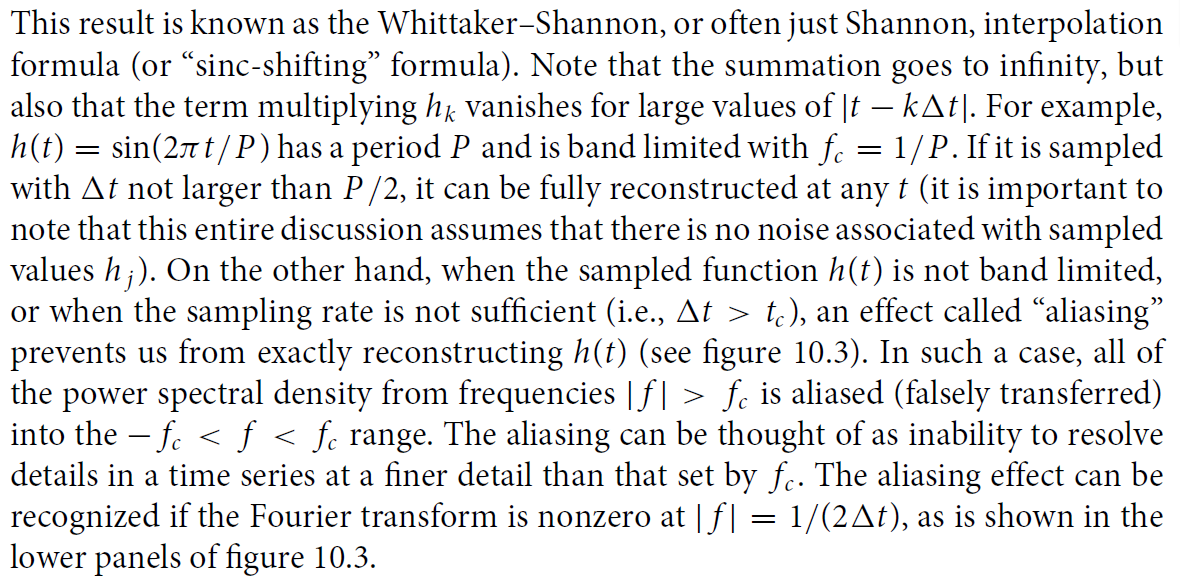

# Part Two

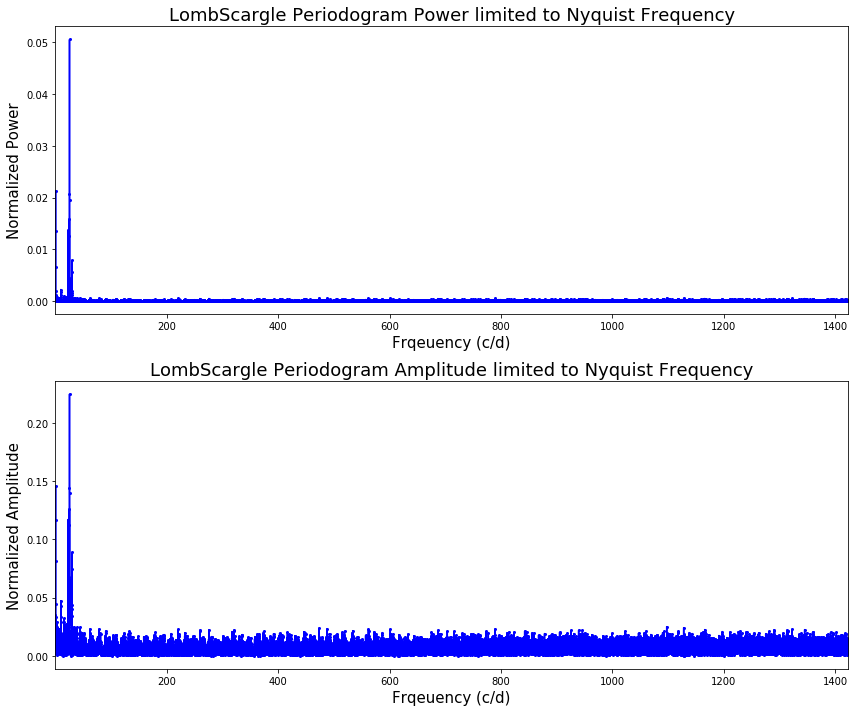

In [36]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(frequency,power,"bo-",markersize=2)
plt.xlabel("Frqeuency (c/d)",fontsize=15)
plt.ylabel("Normalized Power",fontsize=15)
plt.title("LombScargle Periodogram Power limited to Nyquist Frequency",fontsize=18)
plt.xlim(frequency[0],avgNyq)

plt.subplot(212)
amp = np.sqrt(power)
plt.plot(frequency, amp,"bo-",markersize=2)
plt.xlabel("Frqeuency (c/d)",fontsize=15)
plt.ylabel("Normalized Amplitude",fontsize=15)
plt.title("LombScargle Periodogram Amplitude limited to Nyquist Frequency",fontsize=18)
plt.xlim(frequency[0],avgNyq)
plt.tight_layout()
plt.savefig("periodogram2.png")

In [37]:
lombdF = []
for i in range(len(frequency)):
    lombdF.append(frequency[i]-frequency[i-1])

avgdF = np.mean(lombdF[1:])
print("Finest frequency spacing via LombScargle: {}".format(avgdF))
print("Compared to the manually calculated one: {}".format(dF))

Finest frequency spacing via LombScargle: 0.0494692004263453
Compared to the manually calculated one: 0.0494692004263453


In [122]:
localMax = signal.argrelextrema(amp[np.logical_and(frequency>0,frequency<31)], np.greater)
maxAmps = np.sort(amp[localMax])
#sigAmps = maxAmps[201:210]  # print(np.sort(amp[indA]))
sigAmps = maxAmps[173:182]  # print(np.sort(amp[indA]))

indA = np.where(np.in1d(amp, sigAmps))
selectedF = frequency[indA]
selectedA = amp[indA]
selectedF, selectedA

(array([ 0.2720806 ,  9.77016708, 22.6321592 , 23.572074  , 25.00668082,
        25.10561922, 25.25402682, 29.70625486, 30.00307006]),
 array([0.1458112 , 0.04730334, 0.11701556, 0.06753011, 0.12583243,
        0.06612313, 0.22485207, 0.04015497, 0.08899319]))

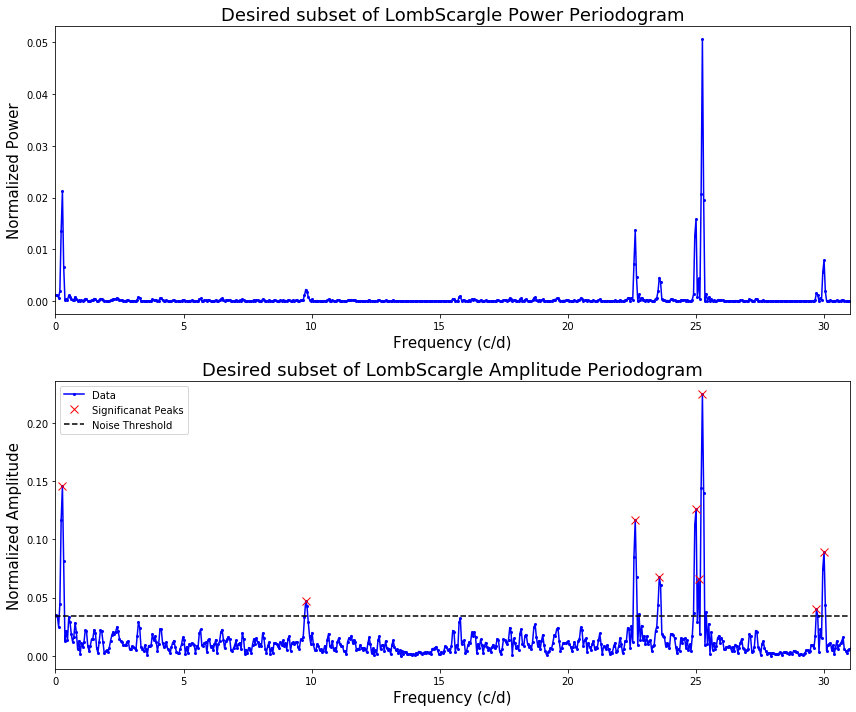

In [44]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(frequency,power,"bo-",markersize=2,label="Data")
plt.xlabel("Frequency (c/d)",fontsize=15)
plt.ylabel("Normalized Power",fontsize=15)
plt.title("Desired subset of LombScargle Power Periodogram",fontsize=18)
plt.xlim(0,31)

noiseTh = 0.03417250883804448  # No more distinct peaks around this value. 
plt.subplot(212)
amp = np.sqrt(power)
plt.plot(frequency, amp,"bo-",markersize=2,label="Data")
plt.plot(selectedF,selectedA,"rx",markersize=8,label="Significanat Peaks")
plt.xlabel("Frequency (c/d)",fontsize=15)
plt.ylabel("Normalized Amplitude",fontsize=15)
plt.title("Desired subset of LombScargle Amplitude Periodogram",fontsize=18)
plt.axhline(y= noiseTh, linestyle='--',color='k',label="Noise Threshold")
plt.legend(loc="upper left")
plt.xlim(0,31)
plt.tight_layout()
plt.savefig("periodogram3.png")

In [117]:
avgNoise = np.mean(amp[amp<=noiseTh])
SN = selectedA/avgNoise
SN

array([20.90106645,  6.78061875, 16.77340238,  9.67999292, 18.03724208,
        9.47831074, 32.23104898,  5.75594856, 12.75658215])

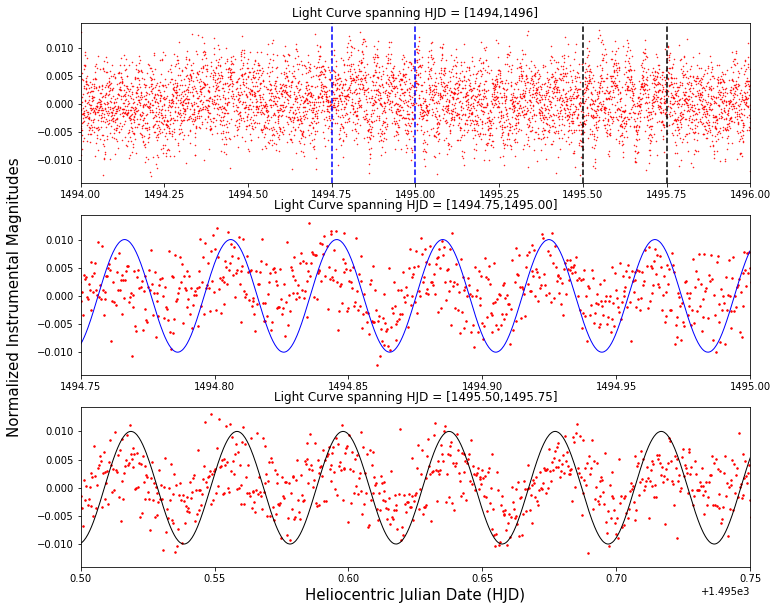

In [53]:
bestF = frequency[np.argmax(amp)]  # corresponding to max amplitude/power

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)   #big subplot
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(date, magNorm, 'r.', markersize=1)
ax1.set_xlim([1494, 1496])
ax1.axvline(x=1495.50, color = 'k', linestyle='--')
ax1.axvline(x=1495.75, color = 'k', linestyle='--')
ax1.axvline(x=1494.75, color = 'b', linestyle='--')
ax1.axvline(x=1495.00, color = 'b', linestyle='--')

ax2.plot(date, magNorm, 'r.', markersize=3)
ax2.plot(date, 0.01*np.sin(2*np.pi*bestF*(date+0.015)), 'b-', linewidth=1)
ax2.set_xlim([1494.75, 1495.00])

ax3.plot(date, magNorm, 'r.', markersize=3)
ax3.plot(date, 0.01*np.sin(2*np.pi*bestF*(date+0.015)), 'k-', linewidth=1)
ax3.set_xlim([1495.50, 1495.75])

# Set common labels
ax.set_xlabel('Heliocentric Julian Date (HJD)', fontsize=15)
fig.text(0.04, 0.5, 'Normalized Instrumental Magnitudes', va='center', rotation='vertical',fontsize=15)

ax1.set_title('Light Curve spanning HJD = [1494,1496]')
ax2.set_title('Light Curve spanning HJD = [1494.75,1495.00]')
ax3.set_title('Light Curve spanning HJD = [1495.50,1495.75]')

plt.savefig("LCsubsetFits.png")

In [70]:
ls = LombScargle(date, magNorm)
print("False Alarm Probability at F = {} is {}".format(selectedF[0], ls.false_alarm_probability(selectedA[0]**2)))
print("False Alarm Probability at best F = {} is {}".format(bestF, ls.false_alarm_probability(0.224**2)))

False Alarm Probability at F = 0.2720806023448991 is 8.385631400580216e-129
False Alarm Probability at best F = 25.254026817649272 is 7.23006e-316


This tells us that under the assumption that there is no periodic signal in the data, we will observe a peak this high or higher approximately 9.85483057485128e-133% of the time, which gives a strong indication that a periodic signal is present in the data.

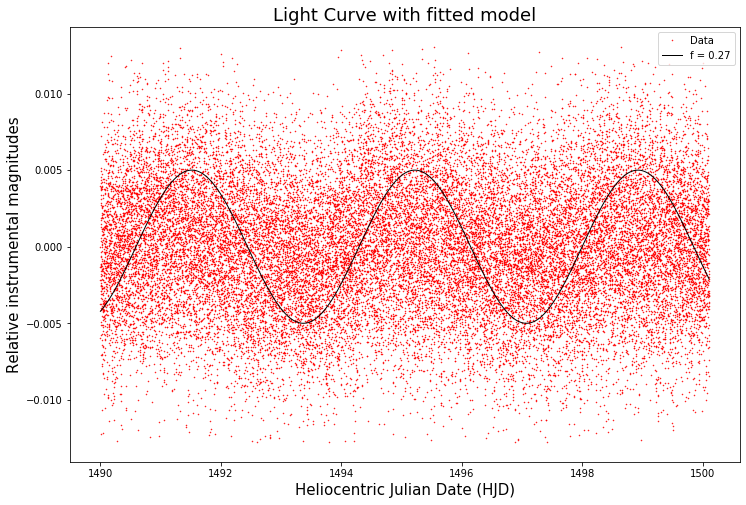

In [19]:
plt.figure(figsize=(12,8))
plt.plot(date, magNorm, 'r.', markersize=1, label="Data")
plt.plot(date, 0.005*np.sin(2*np.pi*0.27*(date+2)), 'k-', linewidth=1,label="f = 0.27")
plt.xlabel("Heliocentric Julian Date (HJD)",fontsize=15)
plt.ylabel("Relative instrumental magnitudes",fontsize=15)
plt.title("Light Curve with fitted model",fontsize=18)
plt.legend(loc="upper right")
plt.savefig('LCBfit.png')

## Noise

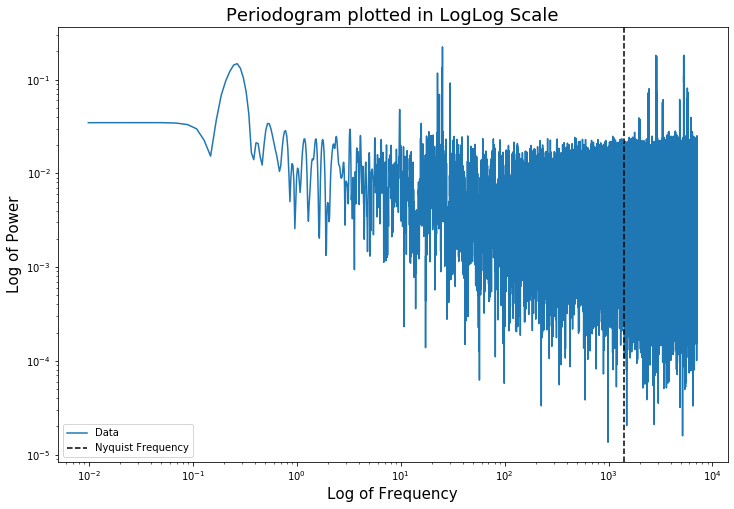

In [20]:
plt.figure(figsize=(12,8))
plt.loglog(frequency,amp, basex=10, basey=10,label="Data")
plt.xlabel("Log of Frequency",fontsize=15)
plt.ylabel("Log of Power",fontsize=15)
plt.title("Periodogram plotted in LogLog Scale",fontsize=18)
plt.axvline(x=avgNyq, linestyle='--',color='k',label="Nyquist Frequency")
plt.legend(loc="lower left")
#print(np.sum(frequency<25))

(0, 0.02)

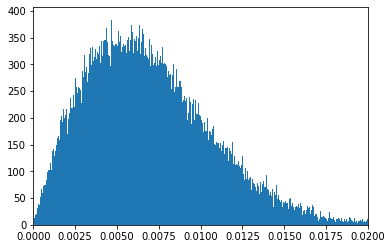

In [80]:
plt.hist(amp,bins=10000)
plt.xlim(0,0.02)

#https://machinelearningmastery.com/white-noise-time-series-python/#:~:text=A%20time%20series%20is%20white%20noise%20if%20the%20variables%20are,other%20values%20in%20the%20series.

In [115]:
max((amp[amp<=noiseTh])), min((amp[amp<=noiseTh])), np.mean((amp[amp<=noiseTh]))

(0.03412895200350619, 2.0526880733325913e-05, 0.0069762565142533995)

In [121]:
dt, avgDt

(0.00036599999998543353, 0.0003514604284025319)